In [1]:
from circuit_tree import *
import copy

from qiskit.primitives import Estimator
from qiskit.quantum_info import Pauli

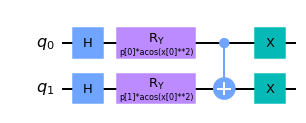

In [2]:
x = ParameterVector("x",1)
p = ParameterVector("p",2)

QC = QuantumCircuit(2)

QC.h([0,1])

QC.ry(p[0]*np.arccos(x[0]*x[0]),0)
QC.ry(p[1]*np.arccos(x[0]*x[0]),1)

QC.cx(0,1)
QC.x([0,1])

QC.draw()

In [3]:
test = simplify_copy(circuit_derivative(circuit_derivative(QC,p),p))
print(test)

[1.0*[1.0*(0.25*acos(x[0]**2)**2*
     ┌───┐┌────────────────────────────┐     ┌───┐
q_0: ┤ H ├┤ Ry(p[0]*acos(x[0]**2) + π) ├──■──┤ X ├
     ├───┤└─┬────────────────────────┬─┘┌─┴─┐├───┤
q_1: ┤ H ├──┤ Ry(p[1]*acos(x[0]**2)) ├──┤ X ├┤ X ├
     └───┘  └────────────────────────┘  └───┘└───┘
 + -0.5*acos(x[0]**2)**2*
     ┌───┐┌────────────────────────┐     ┌───┐
q_0: ┤ H ├┤ Ry(p[0]*acos(x[0]**2)) ├──■──┤ X ├
     ├───┤├────────────────────────┤┌─┴─┐├───┤
q_1: ┤ H ├┤ Ry(p[1]*acos(x[0]**2)) ├┤ X ├┤ X ├
     └───┘└────────────────────────┘└───┘└───┘
 + 0.25*acos(x[0]**2)**2*
     ┌───┐┌────────────────────────────┐     ┌───┐
q_0: ┤ H ├┤ Ry(p[0]*acos(x[0]**2) - π) ├──■──┤ X ├
     ├───┤└─┬────────────────────────┬─┘┌─┴─┐├───┤
q_1: ┤ H ├──┤ Ry(p[1]*acos(x[0]**2)) ├──┤ X ├┤ X ├
     └───┘  └────────────────────────┘  └───┘└───┘
), 1.0*(0.25*acos(x[0]**2)**2*
     ┌───┐┌──────────────────────────────┐     ┌───┐
q_0: ┤ H ├┤ Ry(p[0]*acos(x[0]**2) + π/2) ├──■──┤ X ├
     ├───┤├─────────────────────

In [4]:
test = circuit_derivative(circuit_derivative_v2(circuit_derivative_v2(QC,p[0]),p[0]),p[0])
print(test)

(0.5*acos(x[0]**2)*(0.5*acos(x[0]**2)*(0.5*acos(x[0]**2)*
     ┌───┐┌───────────────────────────────┐     ┌───┐
q_0: ┤ H ├┤ Ry(p[0]*acos(x[0]**2) + 3π/2) ├──■──┤ X ├
     ├───┤└───┬────────────────────────┬──┘┌─┴─┐├───┤
q_1: ┤ H ├────┤ Ry(p[1]*acos(x[0]**2)) ├───┤ X ├┤ X ├
     └───┘    └────────────────────────┘   └───┘└───┘
 + -0.5*acos(x[0]**2)*
     ┌───┐┌──────────────────────────────┐     ┌───┐
q_0: ┤ H ├┤ Ry(p[0]*acos(x[0]**2) + π/2) ├──■──┤ X ├
     ├───┤└──┬────────────────────────┬──┘┌─┴─┐├───┤
q_1: ┤ H ├───┤ Ry(p[1]*acos(x[0]**2)) ├───┤ X ├┤ X ├
     └───┘   └────────────────────────┘   └───┘└───┘
) + -0.5*acos(x[0]**2)*(0.5*acos(x[0]**2)*
     ┌───┐┌──────────────────────────────┐     ┌───┐
q_0: ┤ H ├┤ Ry(p[0]*acos(x[0]**2) + π/2) ├──■──┤ X ├
     ├───┤└──┬────────────────────────┬──┘┌─┴─┐├───┤
q_1: ┤ H ├───┤ Ry(p[1]*acos(x[0]**2)) ├───┤ X ├┤ X ├
     └───┘   └────────────────────────┘   └───┘└───┘
 + -0.5*acos(x[0]**2)*
     ┌───┐┌──────────────────────────────┐     ┌───┐


In [5]:
dic={}
dic[p[0]] = 0.5
dic[p[1]] = 1.0
dic[x[0]] = 0.25

In [6]:
evaluate(test,Estimator(),Pauli("ZZ"),dic,detect_circuit_duplicates=True)

-6.31393506741645e-17

In [7]:
test2 = simplify_copy(test)
print(test2)

(0.125*acos(x[0]**2)**3*
     ┌───┐┌───────────────────────────────┐     ┌───┐
q_0: ┤ H ├┤ Ry(p[0]*acos(x[0]**2) + 3π/2) ├──■──┤ X ├
     ├───┤└───┬────────────────────────┬──┘┌─┴─┐├───┤
q_1: ┤ H ├────┤ Ry(p[1]*acos(x[0]**2)) ├───┤ X ├┤ X ├
     └───┘    └────────────────────────┘   └───┘└───┘
 + -0.375*acos(x[0]**2)**3*
     ┌───┐┌──────────────────────────────┐     ┌───┐
q_0: ┤ H ├┤ Ry(p[0]*acos(x[0]**2) + π/2) ├──■──┤ X ├
     ├───┤└──┬────────────────────────┬──┘┌─┴─┐├───┤
q_1: ┤ H ├───┤ Ry(p[1]*acos(x[0]**2)) ├───┤ X ├┤ X ├
     └───┘   └────────────────────────┘   └───┘└───┘
 + 0.375*acos(x[0]**2)**3*
     ┌───┐┌──────────────────────────────┐     ┌───┐
q_0: ┤ H ├┤ Ry(p[0]*acos(x[0]**2) - π/2) ├──■──┤ X ├
     ├───┤└──┬────────────────────────┬──┘┌─┴─┐├───┤
q_1: ┤ H ├───┤ Ry(p[1]*acos(x[0]**2)) ├───┤ X ├┤ X ├
     └───┘   └────────────────────────┘   └───┘└───┘
 + -0.125*acos(x[0]**2)**3*
     ┌───┐┌───────────────────────────────┐     ┌───┐
q_0: ┤ H ├┤ Ry(p[0]*acos(x[0]**2) - 3π

In [8]:
evaluate(test2,Estimator(),Pauli("ZZ"),dic)

1.6653345369377348e-16

In [9]:
grad = simplify_copy(circuit_derivative(QC,x[0]))
print(grad)


test = simplify_copy(circuit_derivative(grad,x[0]))
print(test)

(-1.0*p[0]*x[0]/sqrt(1 - x[0]**4)*
     ┌───┐┌──────────────────────────────┐     ┌───┐
q_0: ┤ H ├┤ Ry(p[0]*acos(x[0]**2) + π/2) ├──■──┤ X ├
     ├───┤└──┬────────────────────────┬──┘┌─┴─┐├───┤
q_1: ┤ H ├───┤ Ry(p[1]*acos(x[0]**2)) ├───┤ X ├┤ X ├
     └───┘   └────────────────────────┘   └───┘└───┘
 + 1.0*p[0]*x[0]/sqrt(1 - x[0]**4)*
     ┌───┐┌──────────────────────────────┐     ┌───┐
q_0: ┤ H ├┤ Ry(p[0]*acos(x[0]**2) - π/2) ├──■──┤ X ├
     ├───┤└──┬────────────────────────┬──┘┌─┴─┐├───┤
q_1: ┤ H ├───┤ Ry(p[1]*acos(x[0]**2)) ├───┤ X ├┤ X ├
     └───┘   └────────────────────────┘   └───┘└───┘
 + -1.0*p[1]*x[0]/sqrt(1 - x[0]**4)*
     ┌───┐   ┌────────────────────────┐        ┌───┐
q_0: ┤ H ├───┤ Ry(p[0]*acos(x[0]**2)) ├─────■──┤ X ├
     ├───┤┌──┴────────────────────────┴──┐┌─┴─┐├───┤
q_1: ┤ H ├┤ Ry(p[1]*acos(x[0]**2) + π/2) ├┤ X ├┤ X ├
     └───┘└──────────────────────────────┘└───┘└───┘
 + 1.0*p[1]*x[0]/sqrt(1 - x[0]**4)*
     ┌───┐   ┌────────────────────────┐        ┌───┐
q_0: ┤ H

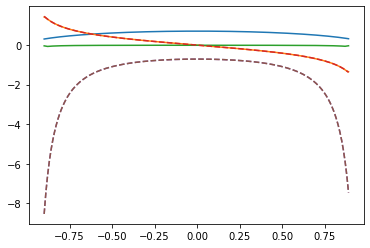

In [11]:
from squlearn.feature_map import QiskitFeatureMap
from squlearn.expectation_operator import SinglePauli
from squlearn.qnn.qnn import QNN
from squlearn import Executor
from qiskit.quantum_info import SparsePauliOp
import matplotlib.pyplot as plt

fm = QiskitFeatureMap(QC,decompose=False)
fm.draw()

qnn = QNN(fm,SinglePauli(2,0,'Z',False),Executor())

x_fine= np.arange(-0.9,0.9,0.01)
y_value = qnn.evaluate_f(x_fine,[0.5,0.24],[])
dfdx_value = qnn.evaluate_dfdx(x_fine,[0.5,0.24],[])
dfdxdx_value = qnn.evaluate_laplace(x_fine,[0.5,0.24],[])

plt.plot(x_fine,y_value)
plt.plot(x_fine,np.gradient(y_value,0.01))
plt.plot(x_fine,np.gradient(np.gradient(y_value,0.01)))

estimator = Estimator()
op = SparsePauliOp("IZ")
yy_test=[]
for xx in x_fine:
    dictionary = {x[0]:xx,p[0]:0.5,p[1]:0.24}
    yy_test.append(evaluate(grad,estimator,op,dictionary))

plt.plot(x_fine,dfdx_value,'--')
plt.plot(x_fine,dfdxdx_value,'--')
plt.plot(x_fine,yy_test,'--')
